In [3]:
# Bigram (one character predicts the next one with a lookup table of counts)
import torch

In [4]:
words = open("names.txt").read().splitlines()

In [5]:
print(len(words))

32033


In [6]:
print(words[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [7]:
print(min(len(word) for word in words))
print(max(len(word) for word in words))

2
15


(array([6.4000e+02, 2.9830e+03, 7.1330e+03, 1.6476e+04, 3.1080e+03,
        1.1180e+03, 5.0800e+02, 2.9000e+01, 3.0000e+01, 8.0000e+00]),
 array([ 2. ,  3.3,  4.6,  5.9,  7.2,  8.5,  9.8, 11.1, 12.4, 13.7, 15. ]),
 <BarContainer object of 10 artists>)

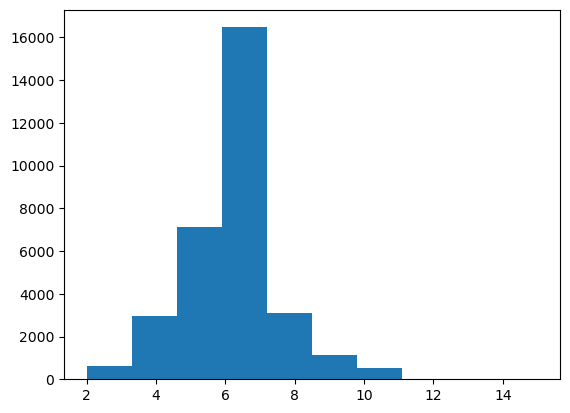

In [8]:
import matplotlib.pyplot as plt
plt.hist([len(word) for word in words])

In [9]:
# pad the word with beginning token "<S>" and end token "<E>" 
# group consecutive chars, Bigram model means that the first char determines the second char
for word in words[:3]:
    chars = ["<S>"] + list(word) + ["<E>"]
    print(chars)
    chars_shifted = chars[1:]  # len -1
    for ch, chs in zip(chars, chars_shifted):  # toss away the extra one in chars
        print(ch, chs)
        

['<S>', 'e', 'm', 'm', 'a', '<E>']
<S> e
e m
m m
m a
a <E>
['<S>', 'o', 'l', 'i', 'v', 'i', 'a', '<E>']
<S> o
o l
l i
i v
v i
i a
a <E>
['<S>', 'a', 'v', 'a', '<E>']
<S> a
a v
v a
a <E>


In [10]:
# what is Language model?
# p (next="o" | hist = "yuxia") (character level)
# or
# p (next = "dog" | hist = "my dog is brown. I love my") (word level)
# P(X1...Xn) = P(X1)P(X2|X1)P(X3|X1:2)...P(Xn|X1:n−1) = product_k=1_to_n of P(x_k|x_1:k-1}  ("entire history")


# N-gram mode: 
# instead of estimate the conditional prob given the "entire history", we estimate it using N chars or N words in the past.

# what is Bigram model?

# on word level, approximates the probability of a word given all the previous words P(w_n|w_1:n−1) by 
# using only the conditional probability of the preceding word P(w_n|w_n−1).
# P(w_1:n) ≈ product_k=1_to_n of P(w_k|w_k-1)

# How Bigram model works on character level?  
# observed (training data) the above names
# 1. calculate the frequency of join probs for all rows (combos), p(1=e, 2=m) = count(1=e, 2=m) / count(1=any, 2=any).sum()
# 2. divided by the count(1=e) to get conditional prob of p(2=m|1=e)
# 3. do so for all combos in the training data


# to use:
# 4. given another data "yuxiao", calculate its likelihood (join prob)
# p(1=y, 2=u, 3=x, 4=i, 5=a, 6=o) = p(".") (which is 1) * p(1=y|0=".") * p(2=u|1=y) * p(3=x|2=u) * p(4=i|3=x) * p(5=a|4=i) * p(6=o|5=a) * p(7="."|"6=o)
# this is called "maximum likelihood estimation or MLE"

# 5. given starting token ".",  generate most likely next char by sampling from conditional prob p(2|1=".") to get next char, do so until we reach end token "." 



In [11]:
b = {}   # key: (ch1, ch2), value: count
for word in words:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)        # the key
        b[bigram] = b.get(bigram, 0) + 1       # use dict.get with default value setting is the easiest way to build a counter dict

# built-in function sorted
# sorted(iterable, /, *, key=None, reverse=False): Return a new sorted list from the items in iterable.
# vs. 
# list.sort(*, key=None, reverse=False): This method sorts the list in place
# key: key specifies a function of one argument that is used to extract a comparison key from each element in iterable (for example, key=str.lower)
#sorted(b.items())  # sort key value pairs based on key alphabetic order, we want based on values in descending order
sorted(b.items(), key = lambda kv: kv[1], reverse=True)


[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [12]:
#another way to store the count:  matrix, first char as row, second char as col. for 1st row, all chars followed by <S>
# turn char to int (encode)
stoi = {s: i+1 for i, s in enumerate(sorted(set(list("".join(words)))))}  # list of a string are chars
# itos = {i+1: s for i, s in enumerate(sorted(set(list("".join(words)))))}
stoi["<S>"] = 0
stoi["<E>"] = 27
print(stoi)
itos = {i: s for s, i in stoi.items()}
print(itos)

# N = torch.zeros(28, 28,)
# N.shape
# N.dtype  # default is float32

N = torch.zeros((28, 28), dtype=torch.int32)
print(N.shape)
print(N.dtype)

for word in words:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        #bigram = (ch1, ch2)
        N[stoi[ch1], stoi[ch2]] += 1

print(N)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '<S>': 0, '<E>': 27}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '<S>', 27: '<E>'}
torch.Size([28, 28])
torch.int32
tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929,    0],
        [   0,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435, 6640],
        [   0,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,


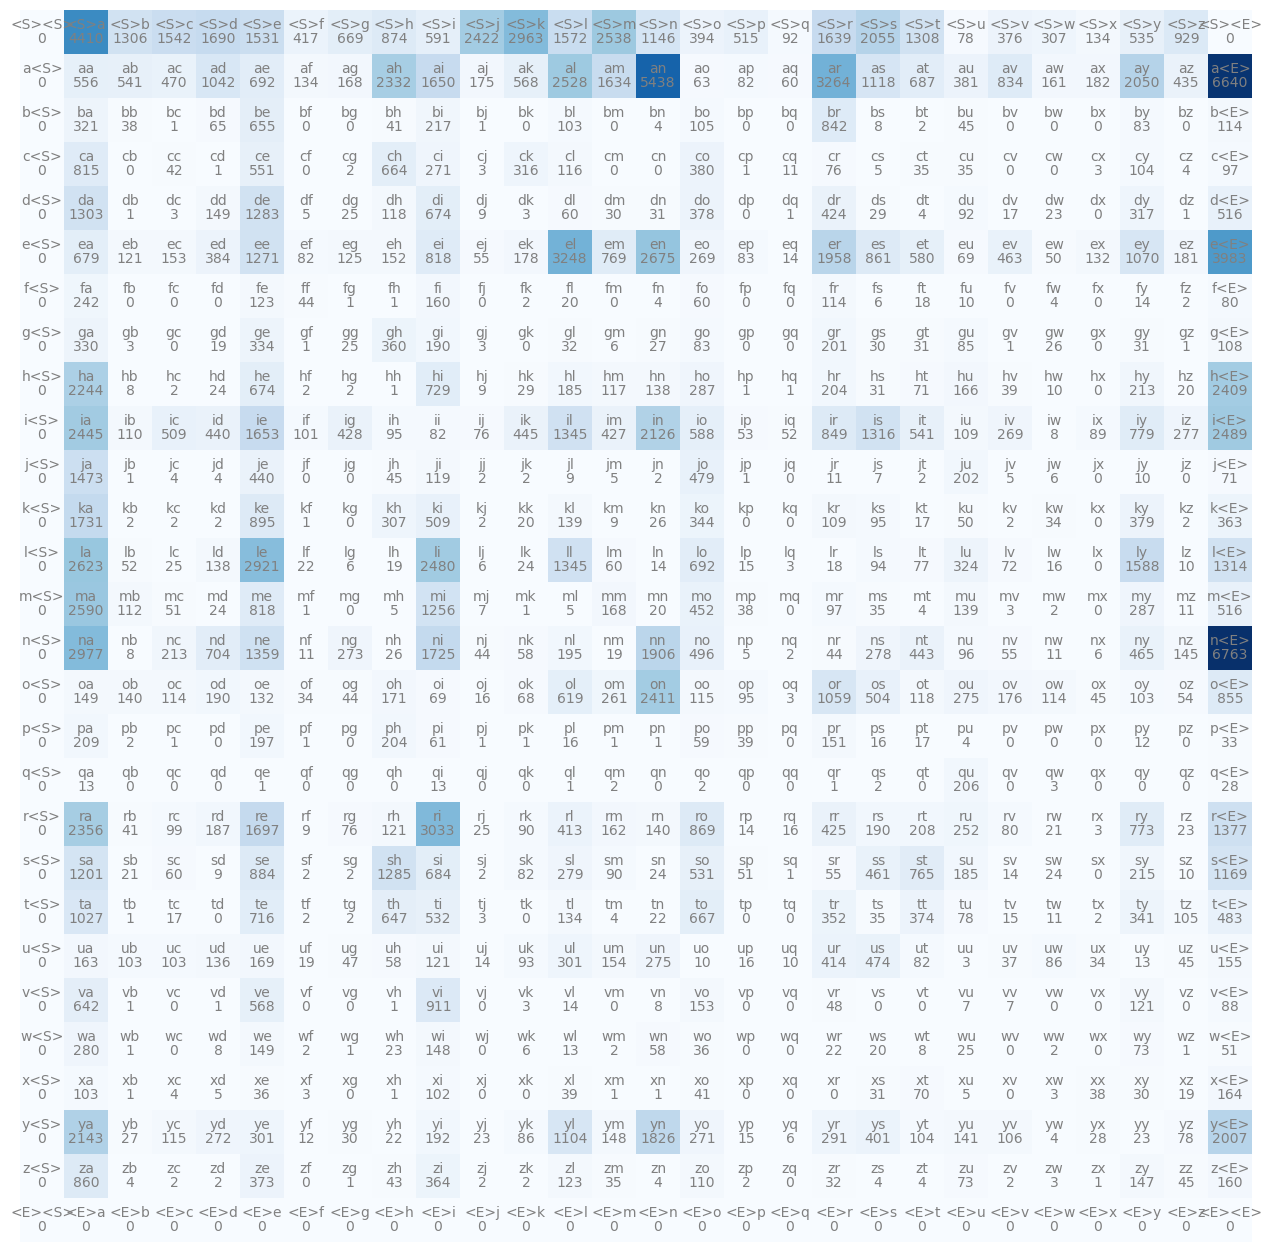

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');
# we are wasting some space on the margin -> reduce <S> and <E> to single one "."

In [14]:
# we are wasting some space on the margin -> reduce <S> and <E> to single one "."

stoi = {s: i+1 for i, s in enumerate(sorted(set(list("".join(words)))))}  # list of a string are chars
# itos = {i+1: s for i, s in enumerate(sorted(set(list("".join(words)))))}
stoi["."] = 0
print(stoi)
itos = {i: s for s, i in stoi.items()}
print(itos)

N = torch.zeros((27, 27), dtype=torch.int32)

for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        #bigram = (ch1, ch2)
        N[stoi[ch1], stoi[ch2]] += 1

print(N)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,   

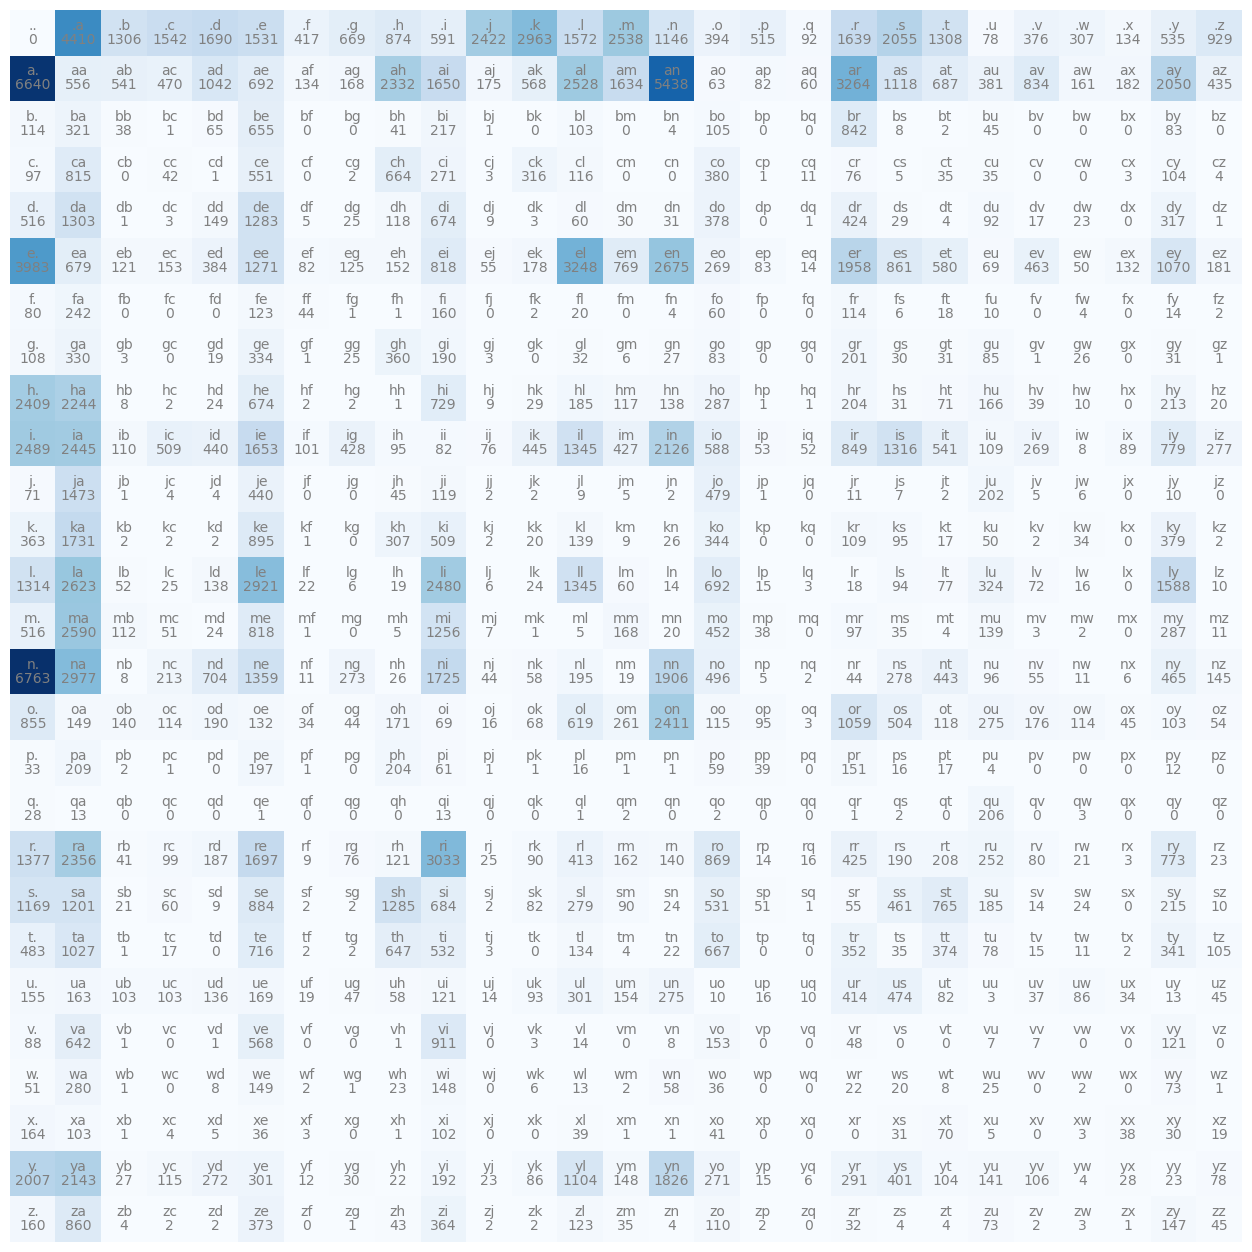

In [15]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [16]:
# total count
total = N.sum()
print("total count: ", total.item())

p_dot = (N[0].sum())/total
print("prob(first is dot) = ", p_dot.item())

total count:  228146
prob(first is dot) =  0.14040569961071014


In [17]:
# count of 1=dot, 2=b is N[0,2] = 1306
p_dot_and_b = N[0,2] / total
print("prob(1=dot, 2=b) = ", p_dot_and_b.item())

p_b_given_dot = p_dot_and_b.item() / p_dot.item()
print("prob(2=b|1=dot) = ", p_b_given_dot)
# or 
p_b_given_dot = N[0,2] / N[0].sum()
print("prob(2=b|1=dot) = ", p_b_given_dot)

prob(1=dot, 2=b) =  0.005724404472857714
prob(2=b|1=dot) =  0.04077045653224363
prob(2=b|1=dot) =  tensor(0.0408)


In [18]:
p = N[0].float()/N[0].sum()
print(p)
g = torch.Generator().manual_seed(2147483647)
# sample from multinomial disctribution parameterazied with these probabilities  p(2=any|1=".")
for _ in range(20):
    ix = torch.multinomial(p, num_samples=1, generator=g).item()
    print(ix)


tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])
3
5
24
2
13
11
13
10
13
12
11
13
18
11
18
3
1
26
11
20


In [19]:
# Turn count matrix to conditional probability matrix
N_row_sum = torch.sum(N, dim=1, keepdim=True)   # keepdim=True return shape (27,1),   keepdim=False return shape (27)
print(N_row_sum)
P = N/N_row_sum    
# # N shape(27, 27), N_row_sum shape (27, 1) broadcasting to (27, 27), 
# if keepdim = False N_row_sum shape (27) broadcasting to (1, 27), then (27, 27) that's divided by col sum., and 
print(P.shape)
print(P[0])

tensor([[32033],
        [33885],
        [ 2645],
        [ 3532],
        [ 5496],
        [20423],
        [  905],
        [ 1927],
        [ 7616],
        [17701],
        [ 2900],
        [ 5040],
        [13958],
        [ 6642],
        [18327],
        [ 7934],
        [ 1026],
        [  272],
        [12700],
        [ 8106],
        [ 5570],
        [ 3135],
        [ 2573],
        [  929],
        [  697],
        [ 9776],
        [ 2398]])
torch.Size([27, 27])
tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])


In [20]:
for _ in range(20):
    out = ""
    pre_ix = 0   # start with "."
    while True:
        ix = torch.multinomial(P[pre_ix], num_samples=1, generator=g).item()
        out += itos[ix]
        pre_ix = ix
        if ix == 0:
            print(out)
            break

aha.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.
feniee.


### GOAL: MLE -> LOSS
MLE: maximize likelihood (product of all these probabilities: P(w_1:n) ≈ product_k=1_to_n of P(w_k|w_k-1)) of the data 
w.r.t. model parameters (statistical modeling), here in this bigram model, parameters are these probabilities in the matrix

equivalent to maximizing the log likelihood (because log is monotonic)
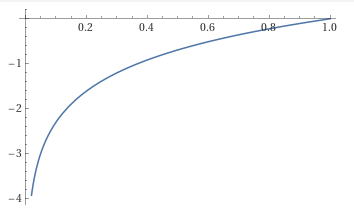

equivalent to minimizing the negative log likelihood
equivalent to minimizing the average negative log likelihood

log(a*b*c) = log(a) + log(b) + log(c)

In [21]:
log_likelihood = 0.0
# loss: -log_likelihood  (the closer to zero, the better)
n = 0
for word in words:
    chs = ["."] + list(word) + ["."]
    # max likelihood for ".emma.": p(e|.) * p(m|e) * p(m|m) * p(a|m) * p(.|a)
    # log of the above product = log(p(e|.)) + log(p(m|e)) + log(p(m|m)) + log(p(a|m)) + log(p(.|a))
    for ch1, ch2 in zip(chs, chs[1:]):
        prob = P[stoi[ch1], stoi[ch2]]
        log_likelihood += torch.log(prob)
        n += 1
        # print(f"{ch1} -> {ch2}, prob = {prob:4f}, log_likelihood = {torch.log(prob):4f}")

print("total log_likelihood: ", log_likelihood)
nll = -log_likelihood
print("Final Loss: average of nll: ", nll/n)

total log_likelihood:  tensor(-559891.7500)
Final Loss: average of nll:  tensor(2.4541)


In [22]:
# to predict a new data using MLE

log_likelihood = 0.0
# loss: -log_likelihood  (the closer to zero, the better)
n = 0
# for word in ["yuxiao", "andrej"]:  # which is fine 
for word in ["yuxiao", "andrejq"]:  # which is not fine because prob(q|j) = 0.0
    chs = ["."] + list(word) + ["."]
    # max likelihood for ".emma.": p(e|.) * p(m|e) * p(m|m) * p(a|m) * p(.|a)
    # log of the above product = log(p(e|.)) + log(p(m|e)) + log(p(m|m)) + log(p(a|m)) + log(p(.|a))
    for ch1, ch2 in zip(chs, chs[1:]):
        prob = P[stoi[ch1], stoi[ch2]]
        log_likelihood += torch.log(prob)
        n += 1
        # print(f"{ch1} -> {ch2}, prob = {prob:4f}, log_likelihood = {torch.log(prob):4f}")

print("total log_likelihood: ", log_likelihood)
nll = -log_likelihood
print(f"n = {n}")
print("Final Loss: average of nll: ", nll/n)

total log_likelihood:  tensor(-inf)
n = 15
Final Loss: average of nll:  tensor(inf)


In [23]:

# smoothing 
# add_1 Laplace smoothing: add 1 to all count in N
N = N + 1
N_row_sum = torch.sum(N, dim=1, keepdim=True)
P = N/N_row_sum
print(P[0])
# or
# P = (N+1).float()
# P /= P.sum(1, keepdims=True)

tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
        1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
        4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
        5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
        4.2109e-03, 1.6719e-02, 2.9008e-02])


In [24]:
log_likelihood = 0.0
# loss: -log_likelihood  (the closer to zero, the better)
n = 0
for word in ["yuxiao", "andrejq"]:
    chs = ["."] + list(word) + ["."]
    # max likelihood for ".emma.": p(e|.) * p(m|e) * p(m|m) * p(a|m) * p(.|a)
    # log of the above product = log(p(e|.)) + log(p(m|e)) + log(p(m|m)) + log(p(a|m)) + log(p(.|a))
    for ch1, ch2 in zip(chs, chs[1:]):
        prob = P[stoi[ch1], stoi[ch2]]
        log_likelihood += torch.log(prob)
        n += 1
        # print(f"{ch1} -> {ch2}, prob = {prob:4f}, log_likelihood = {torch.log(prob):4f}")

print("total log_likelihood: ", log_likelihood)
nll = -log_likelihood
print(f"n = {n}")
print("Final Loss: average of nll: ", nll/n)

total log_likelihood:  tensor(-53.1301)
n = 15
Final Loss: average of nll:  tensor(3.5420)


In [25]:
# to estimate the loss of this bigram model: -neglog(likelihood)
for word t

SyntaxError: invalid syntax (2912119039.py, line 2)

In [26]:
# ============= End of traditional statistial model, Alternative: NN =====================
# input : ch1, with some weights -> out : pred_ch2  
# loss = pred_ch2 vs. ground true ch2
# gradient descend to minimize loss

# create training data
xs, ys = [], []
for word in words:
    chs = ["."] + list(word) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

print(xs[:3])
print(ys[:3])
#make them into tensor
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs.dtype)

[0, 5, 13]
[5, 13, 13]
torch.int64


In [27]:
# turn input tensor into one-hot encoding, essential this is a multi-class classification problem
import torch.nn.functional as F
xs_onehot = F.one_hot(xs) # input to the network: one-hot encoding
print(xs_onehot[:3])
print(xs_onehot.shape)
print(xs_onehot.dtype)
xs_onehot = xs_onehot.float()
print(xs_onehot.dtype)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])
torch.Size([228146, 27])
torch.int64
torch.float32


In [28]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [29]:
# simplest NN, only a linear layer ( no bias)
logits = xs_onehot @ W # we view this outcome as log of count  ( range from -inf to +inf )
print(logits[:2])
# actually logits are the log of odd where odd = p/(1-p), the logit is a type of function that maps probability values from (0,1) to (-inf, inf)

counts = logits.exp() # we can view it as counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'
# softmax(logits) = exp(logits) / sum_of (exp(logits))

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9644e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2844e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4040e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0731e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2198e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01]])


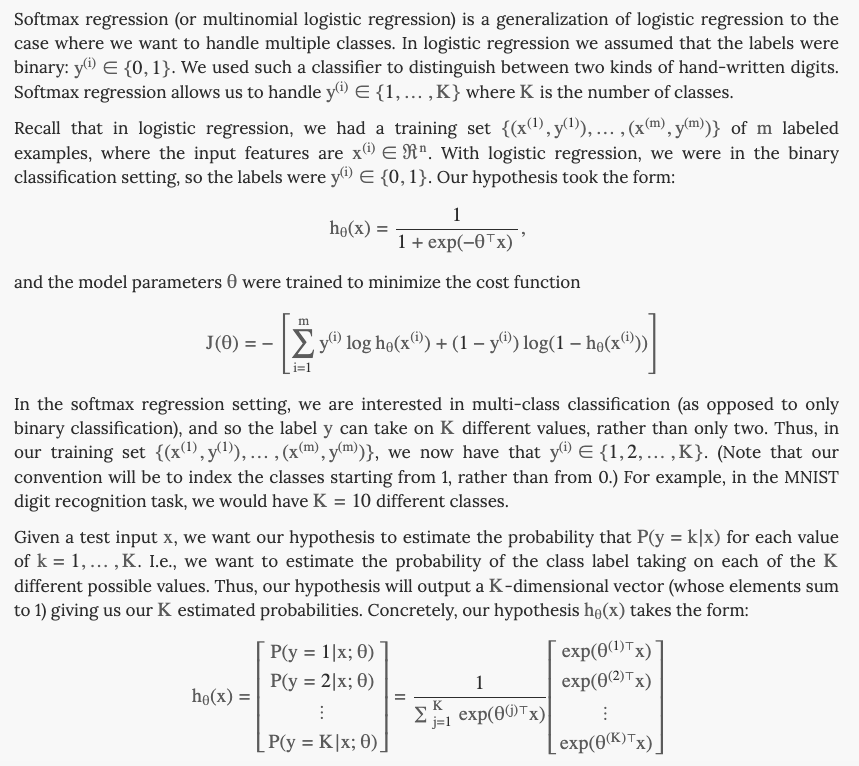

In [30]:
# cross entropy loss  for true label where y(i) = 1 
# loss = - 1*log(prob_of_x(i))  where i is the true label
# loss = -torch.log(prob)
# calculate loss for every training example, sum and take average to get final loss

# F.CrossEntropyLoss : forward(self, input: Tensor, target: Tensor)
# equivalent to softmax(logits) + neg_log

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [57]:
# now we do a forward pass on all data and calculate loss at once
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

# number of iteration on full set
for i in range(300):
    # logits = xs_onehot[:5] @ W
    logits = xs_onehot @ W
    # print(logits.shape)
    exp_logits = logits.exp()
    probs = exp_logits / exp_logits.sum(dim=1, keepdim=True)
    # print(probs)
    # pick up the probs assigned to the true lable index which is ys for each training data
    # print(ys[:5])
    # print( probs[torch.arange(5), ys[:5]])
    # nll = - probs[torch.arange(5), ys[:5]].log()
    nll = - probs[torch.arange(num), ys].log()
    loss = nll.mean() + 0.01*(W**2).mean()   # regularization, force weights to be zero, 0.01 control the power, the more the power, the zero the weights, when weights are all zero, probs are uniform, 0.01 feels like to N + 1, if set to 10, feels like N + 1000
    print(loss.item())

    # backward pass
    W.grad = None  # W is our only parameters
    loss.backward()

    # update gradients
    lr = -50
    if i > 100: 
        lr = -10
    W.data += lr * W.grad


number of examples:  228146
3.7686190605163574
3.3788068294525146
3.161090850830078
3.0271859169006348
2.9344842433929443
2.8672313690185547
2.816654682159424
2.777146577835083
2.745253801345825
2.7188303470611572
2.696505546569824
2.6773719787597656
2.6608052253723145
2.6463515758514404
2.633665084838867
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.582256317138672
2.5764293670654297
2.5711238384246826
2.566272735595703
2.5618226528167725
2.5577263832092285
2.5539441108703613
2.550442695617676
2.5471925735473633
2.5441696643829346
2.5413525104522705
2.538722038269043
2.536262035369873
2.5339581966400146
2.531797409057617
2.5297679901123047
2.527860164642334
2.5260636806488037
2.5243709087371826
2.522773265838623
2.521263837814331
2.519836664199829
2.5184855461120605
2.517204999923706
2.515990734100342
2.5148372650146484
2.5137410163879395
2.512697696685791
2.511704921722412
2.5107581615448
2.509855031967163
2.5089924335479736
2.50816869

In [59]:
print(N[:3])
print(W[:3].exp())


tensor([[   1, 4411, 1307, 1543, 1691, 1532,  418,  670,  875,  592, 2423, 2964,
         1573, 2539, 1147,  395,  516,   93, 1640, 2056, 1309,   79,  377,  308,
          135,  536,  930],
        [6641,  557,  542,  471, 1043,  693,  135,  169, 2333, 1651,  176,  569,
         2529, 1635, 5439,   64,   83,   61, 3265, 1119,  688,  382,  835,  162,
          183, 2051,  436],
        [ 115,  322,   39,    2,   66,  656,    1,    1,   42,  218,    2,    1,
          104,    1,    5,  106,    1,    1,  843,    9,    3,   46,    1,    1,
            1,   84,    1]], dtype=torch.int32)
tensor([[ 0.0686,  7.7749,  2.3010,  2.7164,  2.9770,  2.6970,  0.7417,  1.1822,
          1.5417,  1.0456,  4.2671,  5.2212,  2.7692,  4.4716,  2.0196,  0.7017,
          0.9127,  0.1820,  2.8872,  3.6201,  2.3045,  0.1651,  0.6703,  0.5505,
          0.2543,  0.9477,  1.6382],
        [ 9.3847,  0.7879,  0.7669,  0.6675,  1.4709,  0.9787,  0.2029,  0.2481,
          3.2912,  2.3282,  0.2580,  0.8047,  3.5

In [60]:
# finally, sample from the 'neural net' model with W updated
for _ in range(20):
    ix = 0
    out = []
    while True:
        # wrong: xenc = F.one_hot(torch.tensor([ix]))
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        probs = logits.exp()/ logits.exp().sum(dim=1, keepdim=True)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

jigua.
sadryrolyiniydavesole.
rish.
be.
ka.
nn.
jo.
s.
t.
a.
ze.
brylon.
kymen.
kaedeshaharigaybe.
deyli.
kotallinalerza.
eie.
ke.
s.
s.
